<a href="https://colab.research.google.com/github/jitendra19/stock-market-prediction/blob/main/Stock_market_prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [71]:
# !pip install ta-lib

In [72]:
# Import Python Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')

plt.style.use("fivethirtyeight")
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For reading stock data from yahoo
# from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [73]:
stockName = 'AAPL'
periodOfData = "5y"

# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
ticker = yf.Ticker(stockName)
df = ticker.history(period=periodOfData, auto_adjust=True)

# Show the data
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-14,171.339996,173.779999,171.089996,173.070007,80355000,0.0,0.0
2022-01-18,171.509995,172.539993,169.410004,169.800003,90956700,0.0,0.0
2022-01-19,170.000000,171.080002,165.940002,166.229996,94815000,0.0,0.0
2022-01-20,166.979996,169.679993,164.179993,164.509995,91420500,0.0,0.0
2022-01-21,164.419998,166.330002,162.300003,162.410004,122501300,0.0,0.0


In [74]:
# Technical Indicators
# import talib as ta

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [75]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
# df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [76]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [59]:
split = int(0.8*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [61]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [62]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))


,0,1
0,Open,[7.283131697224117e-16]
1,High,[7.345892740701615e-16]
2,Low,[7.243624912883033e-16]
3,Close,[7.156812862231543e-16]
4,Volume,[1.0391915910672212e-09]
5,Dividends,[9.350766444442354e-21]
6,Stock Splits,[1.1311775331272877e-18]
7,S_10,[7.185976271731328e-16]
8,Corr,[2.2621600479092935e-18]


In [77]:
probability = model.predict_proba(X_test)
# print(probability)

In [64]:
predicted = model.predict(X_test)

In [ ]:
predicted

In [65]:
print(metrics.confusion_matrix(y_test, predicted))

[[  0 119]
 [  0 130]]


In [66]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       119
           1       0.52      1.00      0.69       130

    accuracy                           0.52       249
   macro avg       0.26      0.50      0.34       249
weighted avg       0.27      0.52      0.36       249



In [67]:
print(model.score(X_test,y_test))

0.5220883534136547


In [68]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.536      0.536      0.54032258 0.54032258 0.54032258 0.54032258
 0.54032258 0.54032258 0.54032258 0.54032258]
0.5394580645161289


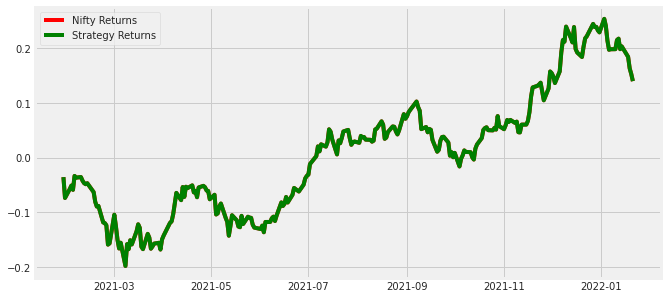

In [69]:
df['Predicted_Signal'] = model.predict(X)
df['Actual_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Actual_returns = np.cumsum(df[split:]['Actual_returns'])

df['Startegy_returns'] = df['Actual_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Actual_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [87]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# df = pdr.get_data_yahoo("AAPL", "2010-11-01", "2020-11-01")
df["Diff"] = df.Close.diff()
df["SMA_2"] = df.Close.rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]
df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)
df = df.drop(
   ["Open", "High", "Low", "Close", "Volume", "Diff", "Close"],
   axis=1,
).dropna()
# print(df)
X = df.drop(["y"], axis=1).values
y = df["y"].values
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.2,
   shuffle=False,
)
clf = LogisticRegression()
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5241935483870968
